In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving selected_data.csv to selected_data.csv
User uploaded file "selected_data.csv" with length 1620 bytes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df_rand = pd.read_csv('selected_data.csv')

In [ ]:
df_rand.head()

,Id,GrLivArea,SalePrice
0,1196,1456,176000
1,924,1617,193000
2,748,2640,265979
3,132,2054,244000
4,360,1924,280000


Analyze dependent variable

In [ ]:
df_price = df_rand.copy()
df_price = df_price.drop(labels = 'GrLivArea', axis = 1)
df_price

,Id,SalePrice
0,1196,176000
1,924,193000
2,748,265979
3,132,244000
4,360,280000
...,...,...
95,1096,176432
96,1363,104900
97,1242,248328
98,207,143900


In [ ]:
df_saleprice = df_price['SalePrice']

In [ ]:
print("Mean:", df_saleprice.mean())
print("Median:", df_saleprice.median())
df_mode = df_saleprice.mode()
if df_mode.is_unique:
  print("No mode.")
else:
  print("Mode:", df_mode)

Mean: 167682.78
Median: 155500.0
No mode.


In [ ]:
print("Variance:", df_saleprice.var())
print("Standard deviation:", df_saleprice.std())

Variance: 3860487358.557169
Standard deviation: 62132.820301006526


In [ ]:
q1, q2, q3 = df_saleprice.quantile([0.25, 0.5, 0.75])
print("First quartile:", q1)
print("Second quartile (median):", q2)
print("Third quartile:", q3)

First quartile: 124125.0
Second quartile (median): 155500.0
Third quartile: 194375.0


In [ ]:
IQR = q3 - q1
print("Interquartile range:", IQR)

Interquartile range: 70250.0


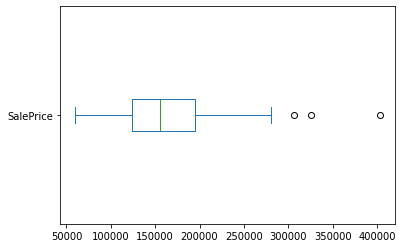

In [ ]:
df_saleprice.plot.box(vert = False)

In [ ]:
df_livingarea = df_rand.copy()
df_livingarea = df_livingarea.drop(labels = 'SalePrice', axis = 1)
df_livingarea.head()

,Id,GrLivArea
0,1196,1456
1,924,1617
2,748,2640
3,132,2054
4,360,1924


In [ ]:
df_area = df_livingarea['GrLivArea']

In [ ]:
print("Mean:", df_area.mean())
print("Median:", df_area.median())
df_mode = df_area.mode()
if df_mode.is_unique:
  print("No mode.")
else:
  print("Mode:", df_mode)

Mean: 1450.01
Median: 1426.0
No mode.


In [ ]:
print("Variance:", df_area.var())
print("Standard deviation:", df_area.std())

Variance: 311012.05040404043
Standard deviation: 557.6845438095272


In [ ]:
q1, q2, q3 = df_area.quantile([0.25, 0.5, 0.75])
print("First quartile:", q1)
print("Second quartile (median):", q2)
print("Third quartile:", q3)

First quartile: 1072.0
Second quartile (median): 1426.0
Third quartile: 1686.75


In [ ]:
IQR = q3 - q1
print("Interquartile range:", IQR)

Interquartile range: 614.75


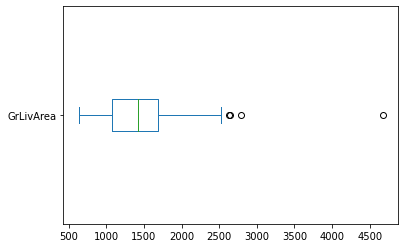

In [ ]:
df_area.plot.box(vert = False)

Text(0, 0.5, 'Price Of House ($)')

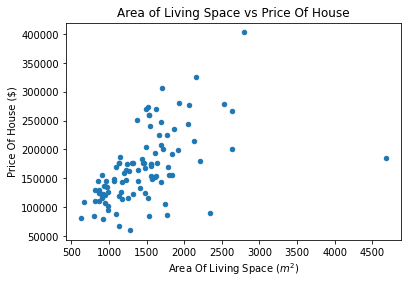

In [ ]:
scatterplot = df_rand.plot.scatter(x = 'GrLivArea', y = 'SalePrice', title='Area of Living Space vs Price Of House')
scatterplot.set_xlabel(r"Area Of Living Space ($m^2$)")
scatterplot.set_ylabel("Price Of House ($)")

Text(0, 0.5, 'Price Of House ($)')

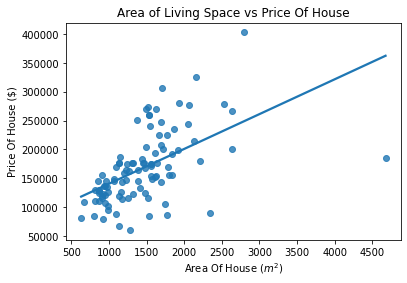

In [ ]:
# No confidence interval
regression = sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = df_rand, fit_reg=True, 
            ci=None)
regression.set(title='Area of Living Space vs Price Of House')
regression.set_xlabel(r"Area Of House ($m^2$)")
regression.set_ylabel("Price Of House ($)")

In [ ]:
np_rand = df_rand.to_numpy()
np_rand[:5]

array([[  1196,   1456, 176000],
       [   924,   1617, 193000],
       [   748,   2640, 265979],
       [   132,   2054, 244000],
       [   360,   1924, 280000]])

In [ ]:
np_livingarea = np_rand[:, 1]
np_saleprice = np_rand[:, 2]

Slope: 60.400674066057576
Offset: 80101.19859747587


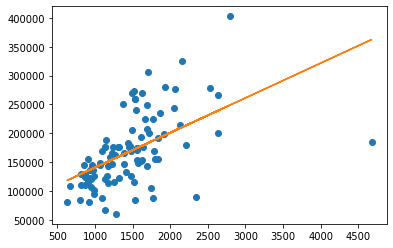

In [ ]:
m, b = np.polyfit(np_livingarea, np_saleprice, 1)
print("Slope:", m)
print("Offset:", b)
plt.plot(np_livingarea, np_saleprice, 'o')
plt.plot(np_livingarea, m*np_livingarea + b)

In [ ]:
# Calculating the parameters using matrix inverses (how polyfit does it)
# https://pythonguides.com/matplotlib-best-fit-line/
x = np_livingarea.reshape(np_rand.shape[0], 1)
X = np.append(x, np.ones((np_rand.shape[0], 1)), axis = 1)
Y = np_saleprice.reshape(np_rand.shape[0], 1)
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
theta

array([[6.04006741e+01],
       [8.01011986e+04]])

In [ ]:
df_rand_cov = df_rand.cov()
df_rand_cov

,Id,GrLivArea,SalePrice
Id,1.761619e+05,-3.015084e+04,-2.460124e+06
GrLivArea,-3.015084e+04,3.110121e+05,1.878534e+07
SalePrice,-2.460124e+06,1.878534e+07,3.860487e+09


In [ ]:
print(df_rand_cov.at['GrLivArea', 'SalePrice'] / df_livingarea.var()['GrLivArea'])

60.40067406605754


In [ ]:
# b = y mean - m * x mean

In [ ]:
print(df_rand['SalePrice'].mean() - (df_rand_cov.at['GrLivArea', 'SalePrice'] / df_livingarea.var()['GrLivArea']) * df_rand['GrLivArea'].mean())

80101.1985974759


In [ ]:
print(np.amax(np_livingarea, axis=0))
print(np.amax(np_saleprice, axis=0))

4676
403000


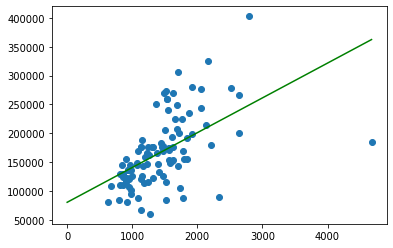

In [ ]:
# Polynomial regression of degree 1

# Use a pretrained polyfit regression model to find the linear regression of the scatter plot
model = np.poly1d(np.polyfit(np_livingarea, np_saleprice, 1))

# Plot fitted line and scatter plot
polyline = np.linspace(1, 4676, 403000)
plt.scatter(np_livingarea, np_saleprice)
plt.plot(polyline, model(polyline), color="green")
plt.show()

In [ ]:
print(model)

 
60.4 x + 8.01e+04


In [ ]:
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#find r-squared of polynomial model with degree = 1
polyfit(np_livingarea, np_saleprice, 1)

{'r_squared': 0.2939129030593478}

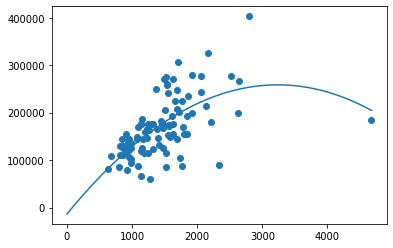

In [ ]:
# Polynomial regression of degree 2

# Use a pretrained polyfit regression model to find the quadratic regression of the scatter plot
model = np.poly1d(np.polyfit(np_livingarea, np_saleprice, 2))

# Plot fitted line and scatter plot
polyline = np.linspace(1, 4676, 403000)
plt.scatter(np_livingarea, np_saleprice)
plt.plot(polyline, model(polyline))
plt.show()

In [ ]:
print(model)
model

          2
-0.02597 x + 168.1 x - 1.346e+04


poly1d([-2.59672199e-02,  1.68091365e+02, -1.34591908e+04])

In [ ]:
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#find r-squared of polynomial model with degree = 3
polyfit(np_livingarea, np_saleprice, 2)

{'r_squared': 0.4076278187477327}

In [ ]:
df_desmos = df_rand.copy()

In [ ]:
df_desmos = df_desmos.drop(columns="Id")
df_desmos

,GrLivArea,SalePrice
0,1456,176000
1,1617,193000
2,2640,265979
3,2054,244000
4,1924,280000
...,...,...
95,1314,176432
96,1738,104900
97,1689,248328
98,1696,143900


In [ ]:
df_desmos.to_csv("desmos.csv", index=False)

[1.0000000e+00 1.0000000e+00 1.6768278e+05]
R² = 0.0
Y = 1.0 * e^(-1.0 * x) + 167682.78
Tau = 50.0 µs


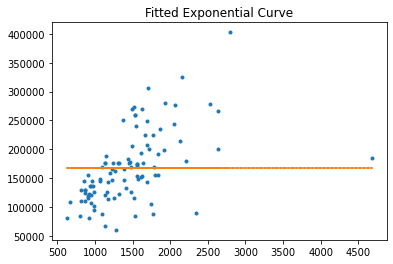

In [ ]:
import scipy

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

# perform the fit
params, cv = scipy.optimize.curve_fit(monoExp, np_livingarea, np_saleprice)
m, t, b = params
print(params)
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(np_saleprice - monoExp(np_livingarea, m, t, b))
squaredDiffsFromMean = np.square(np_saleprice - np.mean(np_saleprice))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(np_livingarea, np_saleprice, '.', label="data")
plt.plot(np_livingarea, monoExp(np_livingarea, m, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
print(f"Tau = {tauSec * 1e6} µs")